In [1]:
%cd ..
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from melp import Detector
import melp
import math
import random
from glob import glob

from melp.clustering.misc import*
import melp.clustering as clump
import melp.clustering.time_cluster as tclump
#from melp import TileAnalyzer
import melp.clustering.spatial_cluster as sclump
import melp.clustering.plots as clump_plt
import melp.clustering.three_frame_cluster as clump_3

plt.rcParams.update({'font.size': 16})

/home/erik/GitHub/melp
Welcome to JupyROOT 6.24/06


In [2]:
time_threshold_used = 1.2
threshold_cluster_width_used = 20 

function_str = "mt_compare_to_tid"
src = "./testdata/sorted/root_files_fixed/mu3e_sorted_000*.root"

args = (time_threshold_used, threshold_cluster_width_used, "big", None, "timetheniterativespatial")

#clump.multithreading.run_mt(function_str, src, args)

In [3]:
src2 = "./melp/clustering/results"

src_frac_corr_frame          = src2 + "/frac_corr_frame_tid_*.txt"
src_frac_corr_clusters_frame = src2 + "/frac_corr_clusters_frame_tid_*.txt"
src_frac_uncorr_frame        = src2 + "/frac_uncorr_frame_tid_*.txt"
src_efficiency_stats         = src2 + "/efficiency_stats_tid_*.txt"

fnames_frac_corr_frame           = glob(src_frac_corr_frame)
fnames_frac_corr_clusters_frame  = glob(src_frac_corr_clusters_frame)
fnames_frac_uncorr_frame         = glob(src_frac_uncorr_frame)
fnames_efficiency_stats          = glob(src_efficiency_stats)

array_frac_corr_frame          = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_frame])
array_frac_corr_clusters_frame = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_clusters_frame])
array_frac_uncorr_frame        = np.concatenate([np.loadtxt(f) for f in fnames_frac_uncorr_frame])
#array_efficiency_stats         = np.concatenate([np.loadtxt(f) for f in fnames_efficiency_stats])

## Efficiency statistics

In [4]:
for f in fnames_efficiency_stats:
    print("File: " + f)
    with open(f, "r", encoding="utf-8") as file:
        for line in file:
            print(line.strip())
    print("\n")

File: ./melp/clustering/results/efficiency_stats_tid_147.txt
Number of analyzed frames:  199841 Number of correct counter fractions:  199841
Total number of hits = 6211731 , Identified correctly + identified incorrectly = 6211690
Identified correctly: 5493010
Identified incorrectly: 718680
Total #hits in frames/#hits in clusters =  1.0000066004581685
Total number of clusters: 3549861 , Hits: 6211731
Number of clusters with hits that are far apart in time: 12524
Number of clusters where tid already exists: 1785376 , Hits: 3074069
Number of clusters where tid already exists, that are accounted for: 1785376
Correctly associated out of all hits:  88.42961808874209 %
Correctly associated out of all hits in clusters:  88.43020176473713 %
Incorrectly associated out of all hits:  11.569721869797647 %
Incorrectly associated out of all hits in clusters:  11.569798235262867 %


File: ./melp/clustering/results/efficiency_stats_tid_164.txt
Number of analyzed frames:  199841 Number of correct counte

## Efficiency plots

### Hits associated to wrong cluster

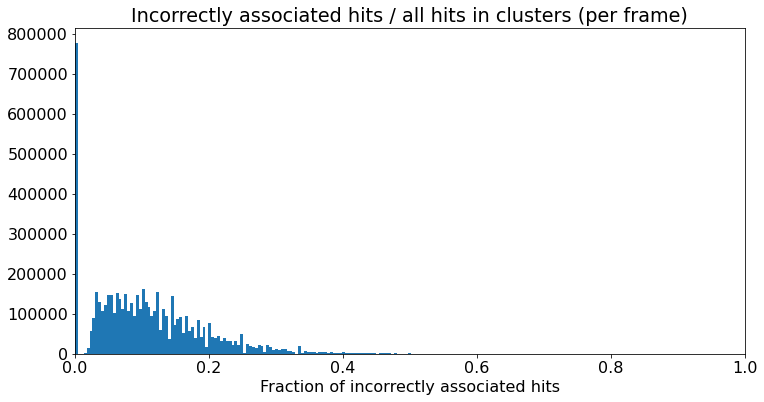

In [5]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_uncorr_frame, bins = 500)
plt.title("Incorrectly associated hits / all hits in clusters (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of incorrectly associated hits")
plt.show()

### Hits associated to correct cluster

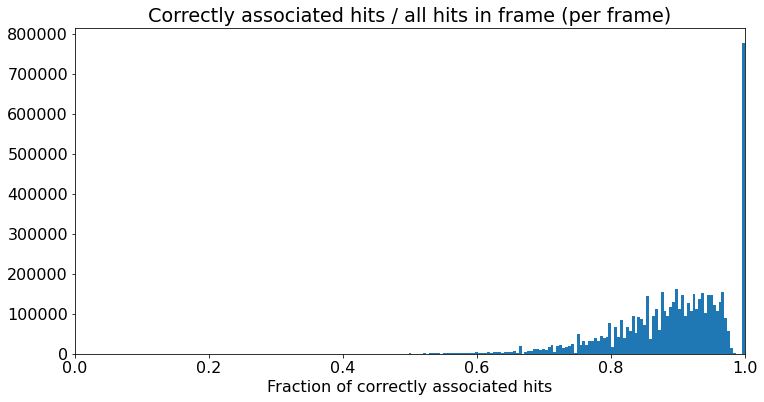

In [6]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_corr_frame, bins = 500)
plt.title("Correctly associated hits / all hits in frame (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of correctly associated hits")
plt.show()

### Combined histograms

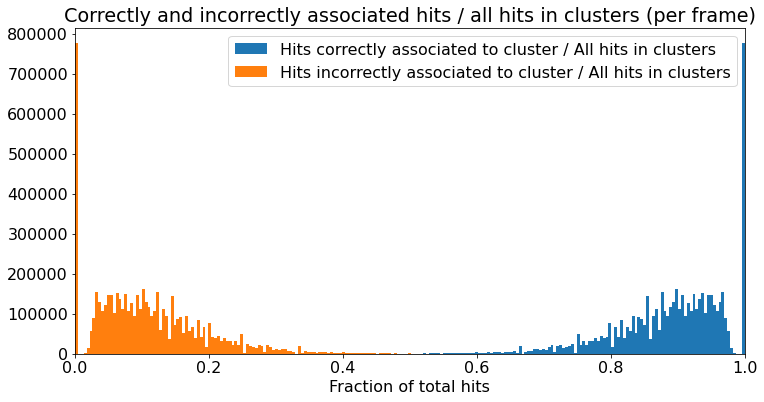

In [7]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_corr_frame, bins = 500, label = "Hits correctly associated to cluster / All hits in clusters")
plt.hist(array_frac_uncorr_frame, bins = 500, label = "Hits incorrectly associated to cluster / All hits in clusters")
plt.title("Correctly and incorrectly associated hits / all hits in clusters (per frame)")
plt.xlim(0,1)
plt.xlabel("Fraction of total hits")
plt.legend()
#plt.savefig("Corr_and_incorr_fractions_hist.png", dpi = 300)
plt.show()

## Efficiency vs maximum cluster width

In [8]:
function_str = "mt_efficiency_as_function_of_cluster_width"

cluster_width_array_used = np.arange(10,101,1)

#print(cluster_width_array)

filename_used = "./testdata/sorted/root_files_fixed/mu3e_sorted_000127.root"
args = (filename_used, time_threshold_used, "big", None, None, "timetheniterativespatial")


clump.multithreading.run_mt(function_str, src, args, cluster_width_array = cluster_width_array_used)

-----------------------
Available threads =  12
Used threads =  10
-----------------------
started thread  4
started thread  1
started thread  7
started thread  10
started thread  16
started thread  19
started thread  13
started thread  25
started thread  22
started thread  28
started thread  11
started thread  5
started thread  20
started thread  17
started thread  23
started thread  2
started thread  29
started thread  8
started thread  14
started thread  26
started thread  12
started thread  3
started thread  18
started thread  24
started thread  6
started thread  21
started thread  15
started thread  30
started thread  9
started thread  27
started thread  31
started thread  34
started thread  37
started thread  40
started thread  43
started thread  46
started thread  49
started thread  52
started thread  55
started thread  58
started thread  35
started thread  32
started thread  38
started thread  44
started thread  41
started thread  47
started thread  53
started thread  50
starte

In [9]:
src3 = "./melp/clustering/results"

src_cluster_width    = src3 + "/efficiency_vs_cluster_width_*.txt"

fnames_cluster_width = glob(src_cluster_width)

array_cluster_width_eff  = []
array_cluster_width = []
array_cluster_width_tmp = []
array_cluster_width_tmp.append([np.loadtxt(f) for f in fnames_cluster_width])
for i in array_cluster_width_tmp[0]:
    array_cluster_width_eff.append(float(i[0]))
    array_cluster_width.append(float(i[1]))

#print(array_cluster_width)

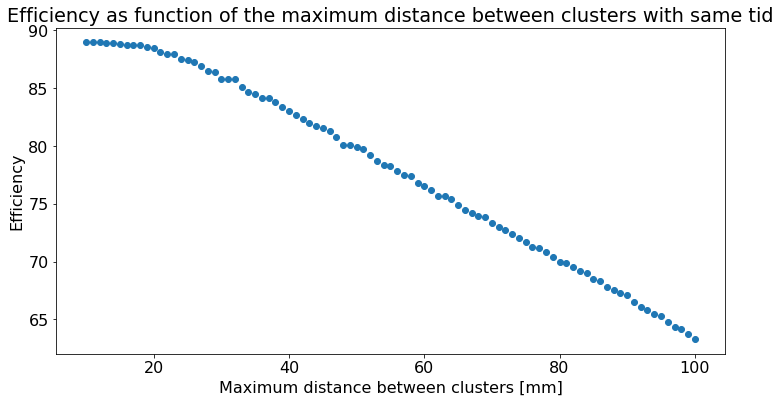

In [10]:
fig = plt.figure(figsize=(12,6))
plt.scatter(array_cluster_width, array_cluster_width_eff)
plt.xlabel("Maximum distance between clusters [mm]")
plt.ylabel("Efficiency")
plt.title("Efficiency as function of the maximum distance between clusters with same tid")
plt.savefig("efficiency_vs_max_distance_threshold_10-100_1_all_frames_each_correct.png", dpi=300)
plt.show()